In [1]:
import torch, time, matplotlib.pyplot, cv2
from torchvision.transforms import transforms

ModuleNotFoundError: No module named 'torch'

In [6]:
def resnetforward(net, data):
    data = net.conv1(data)
    data = net.bn1(data)
    data = net.act1(data)
    data = net.maxpool(data)
    data = net.layer1(data)
    data = net.layer2(data)
    # data = model.resnet50.layer3(data)
    # data = model.resnet50.layer4(data)
    return data

In [22]:
def fun1(ten : torch.tensor):
    tmp = ten.abs() * 255 / ten.abs().max()
    # tmp = tmp.permute(1,2,0)
    return tmp

In [3]:
resnet = timm.create_model('resnet50', pretrained=True)

In [4]:
timm.list_models('resne*t*')

['resnest14d',
 'resnest26d',
 'resnest50d',
 'resnest50d_1s4x24d',
 'resnest50d_4s2x40d',
 'resnest101e',
 'resnest200e',
 'resnest269e',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50d',
 'resnet50t',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101d',
 'resnet152',
 'resnet152d',
 'resnet200',
 'resnet200d',
 'resnetblur18',
 'resnetblur50',
 'resnetrs50',
 'resnetrs101',
 'resnetrs152',
 'resnetrs200',
 'resnetrs270',
 'resnetrs350',
 'resnetrs420',
 'resnetv2_50',
 'resnetv2_50d',
 'resnetv2_50t',
 'resnetv2_50x1_bit_distilled',
 'resnetv2_50x1_bitm',
 'resnetv2_50x1_bitm_in21k',
 'resnetv2_50x3_bitm',
 'resnetv2_50x3_bitm_in21k',
 'resnetv2_101',
 'resnetv2_101d',
 'resnetv2_101x1_bitm',
 'resnetv2_101x1_bitm_in21k',
 'resnetv2_101x3_bitm',
 'resnetv2_101x3_bitm_in21k',
 'resnetv2_152',
 'resnetv2_152d',
 'resnetv2_152x2_bit_teacher',
 'resnetv2_152x2_bit_teacher_384',
 'resnetv2_152x2_bitm',
 'resnetv2_

In [8]:
img = cv2.imread('1479425441182877835.jpg')

In [12]:
data = torch.from_numpy(img).float().permute(2,0,1)

In [15]:
data = resnetforward(resnet, data.unsqueeze(0))

In [18]:
data.shape

torch.Size([1, 512, 60, 80])

In [32]:
out = fun1(data.squeeze(0)[511,:,:]).int().numpy()

In [33]:
out

array([[ 67,  40,  76, ...,  97, 135, 178],
       [  0,   0,   0, ...,  54,   2,   0],
       [  6,   4,   0, ...,   5,   0,   0],
       ...,
       [165, 123,  81, ..., 158, 107, 184],
       [101,  88,  67, ..., 112,  55, 132],
       [105, 114, 114, ..., 141, 102, 255]], dtype=int32)

In [34]:
cv2.imwrite('tmp.png', out)

True

In [11]:
VitNet = timm.models.vision_transformer.vit_base_patch16_224(pretrained=True,
                                                 num_classes=0,
                                                 drop_path_rate=0,
                                                 drop_rate=0)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Att

In [12]:
tmp = torch.ones(1, 3, 1280, 720)

In [1]:
import timm

In [50]:
net = timm.models.resnest14d(pretrained=True)
# net = timm.models.vision_transformer.vit_base_patch16_224(pretrained=False,
#                                                  num_classes=0,
#                                                  drop_path_rate=0,
#                                                  drop_rate=0)

In [51]:
net

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNestBottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (con

In [7]:
img = cv2.imread('1479425441182877835.jpg')

In [29]:
data = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float()

In [30]:
data = net(data)


AssertionError: Input image size (480*640) doesn't match model (224*224).

In [20]:
data.shape

torch.Size([1, 64, 120, 160])

In [24]:
import cv2
cv2.imwrite('./tmp.png', fun1(data.squeeze(0)[10,:,:]).int().numpy())

True

In [31]:
from PIL import Image

In [52]:
img = Image.open('1479425441182877835.jpg')

In [53]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [54]:
transform(img).shape

torch.Size([3, 224, 224])

In [57]:
img.size

(640, 480)

In [4]:
#####deeplabv3 性能测试
sys.path.append("/home/mct/xm/End2End/utils/deeplabv3/model")
from utils.deeplabv3.model.deeplabv3 import DeepLabV3
import os, torch
import torch.nn as nn

In [92]:

network = DeepLabV3("eval_val", project_dir="/home/mct/xm/End2End/utils")
network.load_state_dict(torch.load("/home/mct/xm/End2End/utils/deeplabv3/pretrained_models/model_13_2_2_2_epoch_580.pth"))
network = network.cuda(0)
network.eval()

pretrained resnet, 18


DeepLabV3(
  (resnet): ResNet_BasicBlock_OS8(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d

In [8]:
import cv2
import numpy as np


In [9]:
img = cv2.imread('/home/mct/xm/End2End/TestImg.jpg')
# img = cv2.imread(img_path, -1) # (shape: (1024, 2048, 3))
# resize img without interpolation (want the image to still match
# label_img, which we resize below):
img = cv2.resize(img, (1024, 512), interpolation=cv2.INTER_NEAREST) # (shape: (512, 1024, 3))


# normalize the img (with the mean and std for the pretrained ResNet):
img = img/255.0
img = img - np.array([0.485, 0.456, 0.406])
img = img/np.array([0.229, 0.224, 0.225]) # (shape: (512, 1024, 3))
img = np.transpose(img, (2, 0, 1)) # (shape: (3, 512, 1024))
img = img.astype(np.float32)

# convert numpy -> torch:
img = torch.from_numpy(img) # (shape: (3, 512, 1024))

In [99]:
img = img.unsqueeze(0).cuda()

In [100]:
img

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [33]:
from torch.autograd import Variable
img = Variable(img)

In [70]:
import time

1656086682.4246926

In [96]:
start = time.time()
out = network(img)
end = time.time()
print(end - start)

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [51]:
def label_img_to_color(img):
    label_to_color = {
        0: [128, 64,128],
        1: [244, 35,232],
        2: [ 70, 70, 70],
        3: [102,102,156],
        4: [190,153,153],
        5: [153,153,153],
        6: [250,170, 30],
        7: [220,220,  0],
        8: [107,142, 35],
        9: [152,251,152],
        10: [ 70,130,180],
        11: [220, 20, 60],
        12: [255,  0,  0],
        13: [  0,  0,142],
        14: [  0,  0, 70],
        15: [  0, 60,100],
        16: [  0, 80,100],
        17: [  0,  0,230],
        18: [119, 11, 32],
        19: [81,  0, 81]
        }

    img_height, img_width = img.shape

    img_color = np.zeros((img_height, img_width, 3))
    for row in range(img_height):
        for col in range(img_width):
            label = img[row, col]

            img_color[row, col] = np.array(label_to_color[label])

    return img_color


In [69]:
outputs = out.data.numpy()
pred_label_imgs = np.argmax(outputs, axis=1) # (shape: (batch_size, img_h, img_w))
pred_label_imgs = pred_label_imgs.astype(np.uint8)
for i in range(pred_label_imgs.shape[0]):
    if i == 0:
        pred_label_img = pred_label_imgs[i] # (shape: (img_h, img_w))

        img = img[i] # (shape: (3, img_h, img_w))

        img = img.data.cpu().numpy()
        img = np.transpose(img, (1, 2, 0)) # (shape: (img_h, img_w, 3))
        img = img*np.array([0.229, 0.224, 0.225])
        img = img + np.array([0.485, 0.456, 0.406])
        img = img*255.0
        img = img.astype(np.uint8)

        pred_label_img_color = label_img_to_color(pred_label_img)
        overlayed_img = 0.35*img + 0.65*pred_label_img_color
        overlayed_img = overlayed_img.astype(np.uint8)

        cv2.imwrite("./deeplab.png", overlayed_img)


In [59]:
img[0].shape

torch.Size([3, 512, 1024])

In [5]:
# train test
network = DeepLabV3('0', project_dir="/home/mct/xm/End2End/utils")
network.train()

# loss function
loss_fn = nn.CrossEntropyLoss()

pretrained resnet, 18


In [17]:
network.train()
outputs = network(img.unsqueeze(0))

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 256, 1, 1])

In [14]:
img = cv2.imread('/home/mct/xm/End2End/TestImg.jpg', -1) # (shape: (1024, 2048, 3))
# resize img without interpolation (want the image to still match
# label_img, which we resize below):



# resize img without interpolation (want the image to still match
# label_img, which we resize below):
img = cv2.resize(img, (256, 256),
                    interpolation=cv2.INTER_NEAREST) # (shape: (new_img_h, new_img_w, 3))


# normalize the img (with the mean and std for the pretrained ResNet):
img = img/255.0
img = img - np.array([0.485, 0.456, 0.406])
img = img/np.array([0.229, 0.224, 0.225]) # (shape: (256, 256, 3))
img = np.transpose(img, (2, 0, 1)) # (shape: (3, 256, 256))
img = img.astype(np.float32)

# convert numpy -> torch:
img = torch.from_numpy(img) # (shape: (3, 256, 256))


In [16]:
img.shape

torch.Size([3, 256, 256])

In [2]:
import os
os.sys.path.append('/home/mct/xm/carla-env-0.9.10.1/PythonAPI/carla/dist/carla-0.9.10-py3.7-linux-x86_64.egg')

In [3]:
import carla

In [12]:
client = carla.Client('172.17.0.2', 2000)

In [13]:
traffic_manager = client.get_trafficmanager(8000)

In [14]:
traffic_manager

In [3]:
import torch
import torchvision

In [4]:
net = torchvision.models.resnet50()

In [5]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
data = torch.ones(1, 3, 300, 400)

In [22]:
data = net.conv1(data)
data = net.bn1(data)
data = net.relu(data)
data = net.maxpool(data)

In [23]:
data.shape

torch.Size([1, 64, 75, 100])

In [24]:
data = net.layer1(data)

In [25]:
data.shape

torch.Size([1, 256, 75, 100])

In [26]:
data = net.layer2(data)

In [27]:
data.shape

torch.Size([1, 512, 38, 50])

In [28]:
data = net.layer3(data)

In [29]:
data.shape

torch.Size([1, 1024, 19, 25])

In [30]:
data = net.layer4(data)

In [32]:
data.shape

torch.Size([1, 2048, 10, 13])

In [33]:
data = net.avgpool(data)

In [34]:
data.shape

torch.Size([1, 2048, 1, 1])

In [1]:
from models.DemoV2 import DemoNet
from utils.config import GlobalConfig
from utils.datasets.carla_data import CARLA_Data
from torch.utils.data import DataLoader

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn.functional as F
from torch import nn

In [6]:
config = GlobalConfig()
model = DemoNet(config, 'cuda')
# model = nn.DataParallel(model, device_ids=[0, 1]).cuda()

In [7]:
model.load_state_dict(torch.load(os.path.join('/root/End2End/log/Demov2/demo', 'best_model.pth')))
model.train = False

In [8]:
val_set = CARLA_Data(root=config.val_data, config=config)
dataloader_val = DataLoader(val_set, batch_size=1, shuffle=False, num_workers=2, pin_memory=True)


100%|██████████| 1/1 [00:00<00:00, 44.52it/s]


In [23]:
data = val_set.__getitem__(100)
fronts_in = data['fronts']
fronts = []
for i in range(12):
	fronts.append(fronts_in[i].to('cuda', dtype=torch.float32))

In [24]:
fronts = torch.cat(fronts)
fronts = fronts.view(1, 12, -1, 256, 256)

In [25]:
fronts.shape

torch.Size([1, 12, 3, 256, 256])

In [12]:
image = fronts

In [19]:
model = model.to("cuda:0").module

In [14]:
b, s, c, w, h = image.shape

image = image.view(-1, c, w, h)
for i in range(b * s):

    image[i,0,:,:] = (image[i,0,:,:] - 0.485) / 0.229
    image[i,1,:,:] = (image[i,1,:,:] - 0.456) / 0.224
    image[i,2,:,:] = (image[i,2,:,:] - 0.406) / 0.225

image = image.view(-1, c, w, h)
img_features_total = model.image_encode_net(image)   

_, c, w, h = img_features_total.shape
img_features_total = img_features_total.view(b, s, c, w, h)
img_features = img_features_total[:,:model.post_len,:,:,:]
img_label = img_features_total[:,model.post_len:,:,:,:]
b, s, c, w, h = img_features.shape

# car_status = model.car_status_net(status)
img_features = img_features.view(b, -1, w, h)
post_w = model.post_weight_net(img_features)
post_w = F.normalize(post_w, p=2, dim=1).unsqueeze(2)

img_features = img_features.view(b, s, -1)
post_feature_weight = img_features * post_w

post_feature_weight = post_feature_weight.view(b, s * c, w, h)
pred_features = model.pred_features_net(post_feature_weight) ## (pred_len, w/16 * h/16)

# pred_features = pred_features.view(b, s, c, w, h)
pred_features = pred_features.view(b, s * c, w, h)
pred_w = model.pred_weight_net(pred_features)
pred_w = F.normalize(pred_w, p=2, dim=1).unsqueeze(2)

pred_features = pred_features.view(b, s, -1)
pred_features_weight = pred_features * pred_w

post_feature_weight = post_feature_weight.view(b, s, c, w, h)
pred_features_weight = pred_features_weight.view(b, s, c, w, h)
total_features_weight = torch.cat((post_feature_weight, pred_features_weight), dim=1).view(b, -1)

pred_ctr = model.pred_ctr_net(total_features_weight)
pred_features = pred_features.view(b, s, c, w, h)
# return pred_ctr, pred_features, img_label

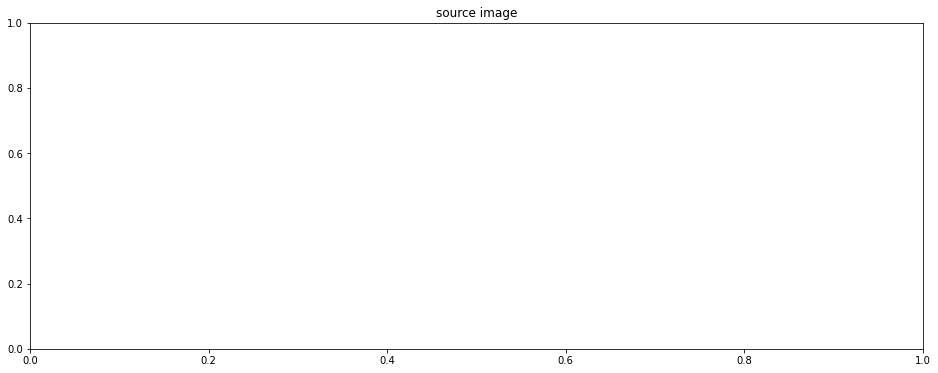

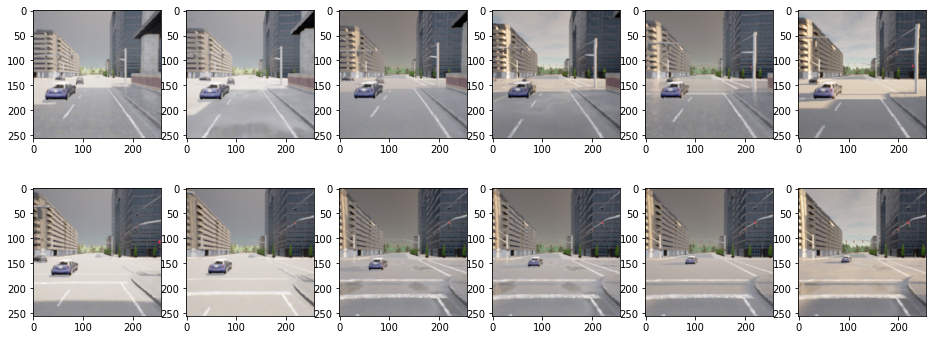

In [26]:
# plt.imshow(fronts[0,5,:,:,:].detach().cpu().permute(1, 2, 0).int())
plt.title('source image')

plt.rcParams['figure.figsize'] = (16.0, 6.0) 
f, axarr = plt.subplots(2, 6)
for i in range(12):
    axarr[i//6][i%6].imshow(fronts[0,i,:,:,:].detach().cpu().permute(1, 2, 0).int(), cmap='Greys_r')

plt.show()

In [16]:
sum_img_features_total = img_features_total.squeeze(0).sum(dim=1)

In [17]:
[sum_img_features_total[i, :, :].max() for i in range(12)]

[tensor(0.2273, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.4080, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.4131, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(1.2404, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(1.4404, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(2.0367, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(3.4497, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.8688, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(1.2338, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(1.7442, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(2.3283, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(2.3897, device='cuda:0', grad_fn=<MaxBackward1>)]

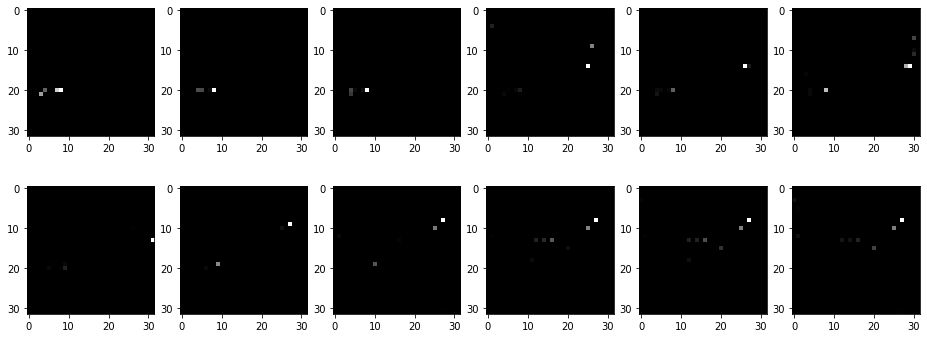

In [18]:
plt.rcParams['figure.figsize'] = (16.0, 6.0) 
f, axarr = plt.subplots(2, 6)
for i in range(12):
    pic1 = sum_img_features_total[i, :, :]
    pic1 = pic1.squeeze(0).detach().cpu()
    axarr[i//6][i%6].imshow(pic1, cmap='Greys_r')

plt.show()


In [20]:
[post_w[0, i] for i in range(6)]

[tensor([0.3964], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([-0.6359], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([-0.0369], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([-0.4642], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([0.1732], device='cuda:0', grad_fn=<SelectBackward>),
 tensor([-0.4379], device='cuda:0', grad_fn=<SelectBackward>)]

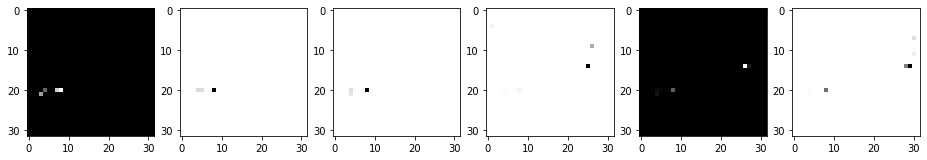

In [21]:
plt.rcParams['figure.figsize'] = (16.0, 6.0) 
f, axarr = plt.subplots(1,6)
for i in range(6):
    pic1 = post_feature_weight.sum(dim=2)[0, i, :, :]
    pic1 = pic1.squeeze(0).detach().cpu()
    # plt.imshow(pic1[:, :], cmap='Greys_r')
    axarr[i].imshow(pic1, cmap='Greys_r')

plt.show()

In [99]:
pred_features.shape

torch.Size([1, 6, 8, 32, 32])

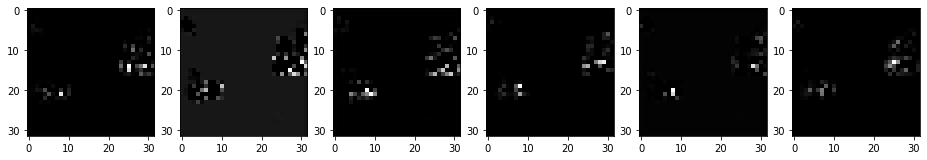

In [30]:
plt.rcParams['figure.figsize'] = (16.0, 6.0)
f, axarr = plt.subplots(1, 6)
for i in range(6):
    pic1 = pred_features[:, :, 0, :, :][0, i, :, :]
    pic1 = pic1.squeeze(0).detach().cpu()
    # plt.imshow(pic1[:, :], cmap='Greys_r')
    axarr[i].imshow(pic1, cmap='Greys_r')

plt.show()

In [33]:
[pred_w[0, i].mean() for i in range(6)]

[tensor(0.2348, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(-0.2232, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(-0.0649, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(-0.1010, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(-0.9366, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0588, device='cuda:0', grad_fn=<MeanBackward0>)]

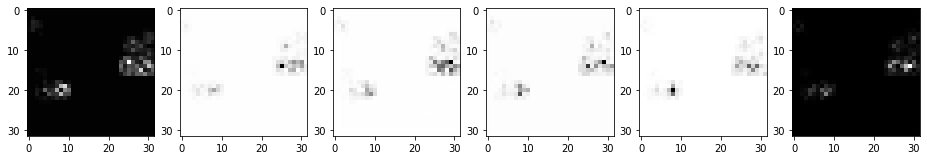

In [34]:
plt.rcParams['figure.figsize'] = (16.0, 6.0) 
f, axarr = plt.subplots(1,6)
for i in range(6):
    pic1 = pred_features_weight.sum(dim=2)[0, i, :, :]
    pic1 = pic1.squeeze(0).detach().cpu()
    # plt.imshow(pic1[:, :], cmap='Greys_r')
    axarr[i].imshow(pic1, cmap='Greys_r')

plt.show()

In [ ]:
img_label

In [38]:
torch.save(model.state_dict(), os.path.join('/root/End2End/log/Demov2/demo', 'best_model.pth'))

In [27]:
train_loss = [0.42102893890991605, 0.21453905837891035, 0.17293692750167355, 0.14598691074356232, 0.13127867280416292, 0.11887104734012933, 0.10762474775212268, 0.10091487052914215, 0.09336531670024134, 0.08748374291223614, 0.08307797163852478, 0.07751834162906425, 0.07408902614237103, 0.07007517495307408, 0.06595224415411381, 0.06413258823298223, 0.060996136226219265, 0.05900330454978633, 0.057693300073430556, 0.05524922428933317, 0.05204528441002006, 0.050683020263246885, 0.048376899014852225, 0.04854687148296874, 0.04686920367474731, 0.04689540970777098, 0.04517022412818895, 0.044172262284930236, 0.04242718213059212, 0.04143941319190374, 0.04068212087062022, 0.039111719077631626, 0.03808942484057011, 0.03597316748067124, 0.035595935574822025, 0.03453617802285271, 0.03405157280511746, 0.03440601372300354, 0.03394199451686789, 0.03181814676954424, 0.032750686528543904, 0.034338817319335184, 0.03209084040510838, 0.030915779890875295, 0.03066833077113412, 0.030311616230118153, 0.028871156591028995, 0.028376618951992835, 0.02808167940094965, 0.028073630815575998, 0.028070441089978772, 0.027357426728759827, 0.02655839136712355, 0.02572716805726698, 0.026487130700444728, 0.026027426823705742, 0.02723041653939306, 0.02558683527773884, 0.024356402747001345, 0.025234492931017424, 0.0267170293412924, 0.024710241363906902, 0.023195513702724893, 0.02347774012652162, 0.023921925502778222, 0.02374953603091305, 0.022500099162953868, 0.02185608849267488, 0.021707855788544332, 0.021154422123202007, 0.02084124799856074, 0.02193137074418825, 0.023682972460934152, 0.022451956541124373, 0.02169048339638808, 0.021070288963080067, 0.019744852240427, 0.02109658978050192, 0.02157784737519001, 0.020766781710011707, 0.0212097856716878, 0.02097592347027249, 0.019506490623501883, 0.01938682960103942, 0.0195858109174679, 0.018772001347938324, 0.01828711964540847, 0.01869292138303847, 0.019601368458546084, 0.020896118966709464, 0.020352518917954438, 0.019392757083302084, 0.01957699406911198, 0.018130917932953024, 0.01788797883846325, 0.018324205374396215, 0.019341328890981432, 0.020380986541866847, 0.02109291914321023, 0.020850524835747807, 0.018238622551681856]
val_loss = [0.26457640528678894, 0.28214427026418537, 0.28967287830817395, 0.3095020430210309, 0.2962478666733473, 0.3172094856317227, 0.30261734357246983, 0.30756557637300247, 0.2927265262756592, 0.30253677051036787, 0.3014594742502922, 0.30066345975949216, 0.3332202734473424, 0.31563896341965747, 0.3212246025602023, 0.34148032313738114, 0.30382064137703335, 0.3305017653948221, 0.32101540382091814, 0.3287089212964743, 0.3179248548471011]

In [ ]:
plt.plot(range(len(train_loss)), train_loss, color='red')
plt.plot(range(0, len(train_loss), 5), val_loss, color='blue')
